### Reviews Dataset EDA

## Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
import gdown

In [17]:
# Load Data
# Read the CSV for listings
url = f"https://drive.google.com/uc?export=download&id=1sh3Nhsy9D_LyAm-1zIyUpN38RY-TIwbM"
gdown.download(url, output, quiet=False)
reviews_data = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1sh3Nhsy9D_LyAm-1zIyUpN38RY-TIwbM
From (redirected): https://drive.google.com/uc?export=download&id=1sh3Nhsy9D_LyAm-1zIyUpN38RY-TIwbM&confirm=t&uuid=a7c94eea-1a87-4e01-8b4f-c8c37bce03d9
To: /content/reviews.csv
100%|██████████| 305M/305M [00:01<00:00, 180MB/s]


## Basic Statistics

In [18]:
# Data First Few Lines
reviews_data.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...
5,2595,1238204,2012-05-07,1783688,Sergey,Hi to everyone!\r<br/>Would say our greatest c...
6,2595,1293632,2012-05-17,1870771,Loïc,"Jennifer was very friendly and helpful, and he..."
7,2595,2022498,2012-08-18,2124102,Melanie,This apartment is like a real castle old and u...
8,2595,4682989,2013-05-20,496053,Eric,Jennifer's place was in a great midtown locati...
9,2595,13193832,2014-05-21,13685934,Gerald,Jennifer is a very nice host. Everything is cl...


In [ ]:
#Change Date Type
reviews_data['date'] = pd.to_datetime(reviews_data['date'])

reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969486 entries, 0 to 969485
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     969486 non-null  int64         
 1   id             969486 non-null  int64         
 2   date           969486 non-null  datetime64[ns]
 3   reviewer_id    969486 non-null  int64         
 4   reviewer_name  969483 non-null  object        
 5   comments       969251 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 44.4+ MB


In [ ]:
# Data Description
reviews_data.describe()

,listing_id,id,date,reviewer_id
count,9.694860e+05,9.694860e+05,969486,9.694860e+05
mean,1.636331e+17,4.890135e+17,2021-02-20 06:09:18.466651648,1.612247e+08
min,2.595000e+03,3.149000e+03,2009-05-25 00:00:00,1.000000e+00
25%,9.841695e+06,3.664798e+08,2019-01-02 00:00:00,3.144509e+07
50%,2.761288e+07,5.209964e+17,2021-12-19 00:00:00,1.058853e+08
75%,5.170911e+07,9.101962e+17,2023-06-09 00:00:00,2.506889e+08
max,1.308179e+18,1.325553e+18,2025-01-02 00:00:00,6.696213e+08
std,3.350861e+17,4.734849e+17,NaN,1.572517e+08


In [ ]:
#total values per column
reviews_data.count()

listing_id       969486
id               969486
date             969486
reviewer_id      969486
reviewer_name    969483
comments         969251
dtype: int64

In [ ]:
#check number of unique values in each column
reviews_data.nunique()

listing_id        25892
id               969486
date               5313
reviewer_id      854761
reviewer_name    119505
comments         932255
dtype: int64

In [ ]:
#unqiue values in each column
reviews_data.nunique()

listing_id        25892
id               969486
date               5313
reviewer_id      854761
reviewer_name    119505
comments         932255
dtype: int64

## Data Cleaning

In [ ]:
#Filling missing values (comments = 235, review_name = 3)
reviews_data['comments'].fillna("blank", inplace=True)
reviews_data['reviewer_name'].fillna("none", inplace=True)
reviews_data.isnull().sum()

/var/folders/ty/6fgg1z7510q7jrn5jmwz63tm0000gn/T/ipykernel_36791/2331579940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_data['comments'].fillna("blank", inplace=True)
/var/folders/ty/6fgg1z7510q7jrn5jmwz63tm0000gn/T/ipykernel_36791/2331579940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

## Text Length Analysis

In [ ]:
#word_count
reviews_data['word_count'] = reviews_data['comments'].str.split().str.len()
reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,word_count
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...,124
1,2595,19176,2009-12-05,53267,Cate,Great experience.,2
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,90
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",66
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,24


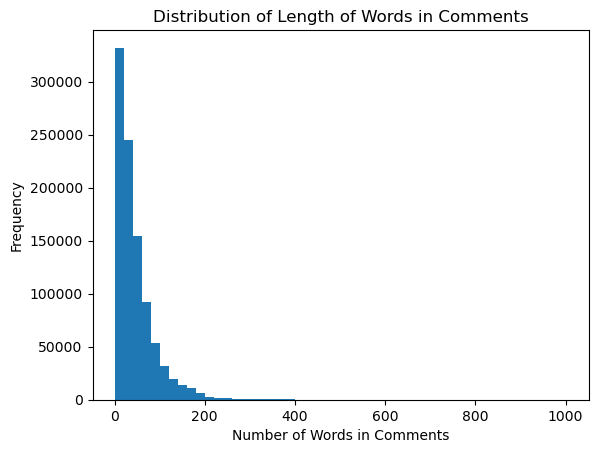

In [ ]:
#counting occurances of word_count
reviews_data['word_count'].value_counts()

#plotting a scatter x axis (word_count), y axis (frequency)
import matplotlib.pyplot as plt
plt.hist(reviews_data['word_count'], bins=50)
plt.xlabel('Number of Words in Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Words in Comments')
plt.show()

In [ ]:
#summary stat of word_count (mean, median, mode, SD)
print(reviews_data['word_count'].mean())
print(reviews_data['word_count'].median())
print(reviews_data['word_count'].mode())
print(reviews_data['word_count'].std())

44.98108172784342
32.0
0    2
Name: word_count, dtype: int64
45.95872733148184


# Detect Language & HTML Tag

In [ ]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from collections import Counter
import re
from langdetect import detect
from tqdm import tqdm

tqdm.pandas()

def contains_html(text):
    return bool(re.search(r'<[^>]+>', str(text)))

reviews_data['has_html'] = reviews_data['comments'].progress_apply(contains_html)
html_count = reviews_data['has_html'].sum()

def detect_language(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

reviews_data['language'] = reviews_data['comments'].progress_apply(detect_language)
language_counts = Counter(reviews_data['language'])

print("\n=== Number of Comments Containing HTML ===")
print(f"Total {html_count} comments contain HTML tags.")

print("\n=== Language Distribution ===")
print(language_counts)

100%|██████████████████████████████████| 969486/969486 [16:16<00:00, 993.24it/s]



=== Number of Comments Containing HTML ===
Total 161026 comments contain HTML tags.

=== Language Distribution ===
Counter({'en': 842931, 'es': 33896, 'fr': 33837, 'de': 13736, 'it': 6128, 'pt': 5594, 'ro': 3827, 'zh-cn': 3203, 'nl': 3191, 'ko': 3057, 'unknown': 2670, 'so': 2138, 'af': 1687, 'ru': 1437, 'ca': 1424, 'ja': 1288, 'pl': 1242, 'tl': 950, 'cs': 917, 'no': 867, 'da': 849, 'sv': 605, 'sw': 421, 'hu': 352, 'tr': 351, 'id': 332, 'cy': 323, 'zh-tw': 314, 'fi': 285, 'hr': 285, 'he': 272, 'vi': 225, 'sk': 178, 'et': 161, 'sl': 160, 'ar': 87, 'el': 62, 'th': 40, 'uk': 39, 'lt': 31, 'lv': 30, 'sq': 25, 'bg': 23, 'mk': 10, 'ur': 4, 'fa': 2})


In [ ]:
language_name_map = {
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'de': 'German',
    'it': 'Italian',
    'pt': 'Portuguese',
    'ro': 'Romanian',
    'zh-cn': 'Chinese (Simplified)',
    'nl': 'Dutch',
    'ko': 'Korean',
    'unknown': 'Unknown',
    'so': 'Somali',
    'af': 'Afrikaans',
    'ru': 'Russian',
    'ca': 'Catalan',
    'ja': 'Japanese',
    'pl': 'Polish',
    'tl': 'Tagalog',
    'cs': 'Czech',
    'no': 'Norwegian',
    'da': 'Danish',
    'sv': 'Swedish',
    'sw': 'Swahili',
    'tr': 'Turkish',
    'hu': 'Hungarian',
    'cy': 'Welsh',
    'id': 'Indonesian',
    'zh-tw': 'Chinese (Traditional)',
    'hr': 'Croatian',
    'fi': 'Finnish',
    'he': 'Hebrew',
    'vi': 'Vietnamese',
    'sk': 'Slovak',
    'sl': 'Slovenian',
    'et': 'Estonian',
    'ar': 'Arabic',
    'el': 'Greek',
    'th': 'Thai',
    'uk': 'Ukrainian',
    'lv': 'Latvian',
    'lt': 'Lithuanian',
    'sq': 'Albanian',
    'bg': 'Bulgarian',
    'mk': 'Macedonian',
    'ur': 'Urdu',
    'fa': 'Persian (Farsi)'
}

language_counts_full = {language_name_map.get(code, code): count for code, count in language_counts.items()}

df_language_counts = pd.DataFrame.from_dict(language_counts_full, orient='index', columns=['Count']).reset_index()
df_language_counts.columns = ['Language', 'Count']

print("\n=== Language Distribution ===")
print(df_language_counts)


=== Language Distribution ===
                 Language   Count
0                  French   33837
1                Romanian    3827
2                 English  842931
3                   Dutch    3191
4                 Spanish   33896
5                  German   13736
6                 Italian    6128
7                   Czech     917
8                  Polish    1242
9                 Catalan    1424
10                 Korean    3057
11               Japanese    1288
12                  Welsh     323
13  Chinese (Traditional)     314
14             Portuguese    5594
15              Afrikaans    1687
16              Hungarian     352
17                Russian    1437
18                Unknown    2670
19                Tagalog     950
20                Swedish     605
21   Chinese (Simplified)    3203
22                 Hebrew     272
23             Indonesian     332
24                 Danish     849
25                 Somali    2138
26              Norwegian     867
27               